# Acceptance rate schedule is robust

In [34]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

In [5]:
histories = []
for n_t in [2, 5, 10, 15, 20]:
    # model
    mv = ModelVars(n_t=n_t)

    # data
    data = mv.get_model_noisy()(mv.p_true)
    acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
    temperature = pyabc.Temperature(
        initial_temperature=pyabc.AcceptanceRateScheme(),
        schemes=[pyabc.AcceptanceRateScheme(), pyabc.ExpDecayFixedIterScheme()])

    # define the analysis
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=temperature,
        acceptor=acceptor)
    abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
    histories.append(abc.run(max_nr_populations=10))

INFO:History:Start <ABCSMC(id=70, start_time=2019-11-13 14:47:15.273720, end_time=None)>
DEBUG:Acceptor:pdf_norm=5.9862e+00 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 15.474178891635113.
INFO:ABC:Acceptance rate: 100 / 349 = 2.8653e-01 ,ess=99.99999999999997
DEBUG:Acceptor:pdf_norm=5.9862e+00 for t=1.
DEBUG:Epsilon:Proposed temperatures: [1.9232178565596143, 11.413766656798346].
INFO:ABC:t: 1, eps: 1.9232178565596143.
INFO:ABC:Acceptance rate: 100 / 434 = 2.3041e-01 ,ess=90.27546764757922
DEBUG:Acceptor:pdf_norm=5.9862e+00 for t=2.
DEBUG:Epsilon:Proposed temperatures: [1.0, 1.7722497441099392].
INFO:ABC:t: 2, eps: 1.0.
INFO:ABC:Acceptance rate: 100 / 278 = 3.5971e-01 ,ess=72.59684210935177
DEBUG:Acceptor:pdf_norm=5.9862e+00 for t=3.
DEBUG:Epsilon:Proposed temperatures: [1.0, 1.0].
INFO:History:Done <ABCSMC(id=70, start_time=2019-11-13 14:47:15.273720, end_time=2019-11-13 14:47:19.830106)>
INFO:History:Start <ABCSMC(id=71, start_time=2019-11-13 14:47:19.857747,

KeyboardInterrupt: 

  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/base.py", line 1198, in __iter__
    if is_datetimelike(self._values):
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/common.py", line 856, in is_datetimelike
    or is_datetime64tz_dtype(arr)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4972, in sample
    return self.take(locs, axis=axis, is_copy=False)
  File "/home/yannik/pyabc/pyabc/transition/base.py", line 90, in rvs
    return self.rvs_single()
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/common.py", line 539, in is_datetime64tz_dtype
    def is_datetime64tz_dtype(arr_or_dtype):
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 3605, in take
    indices, axis=self._get_block

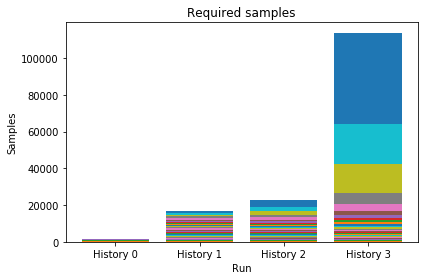

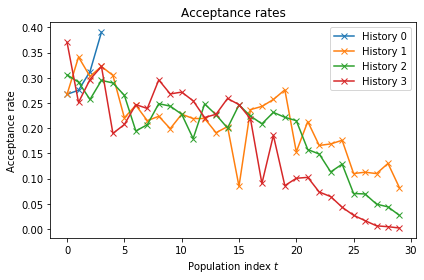

In [11]:
pyabc.visualization.plot_sample_numbers(histories)
pyabc.visualization.plot_acceptance_rates_trajectory(histories)

In [35]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
#from study_abc_noise.model import \
#    HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=10)

# data
data = mv.get_model_noisy()(mv.p_true)

In [4]:
acceptor = pyabc.StochasticAcceptor()#pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.AcceptanceRateScheme(), pyabc.ExpDecayFixedRatioScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
history_adaptive = abc.run(max_nr_populations=20)

INFO:History:Start <ABCSMC(id=102, start_time=2019-11-13 16:24:54.339026, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.5839e+01 for t=0.
INFO:ABC:t: 0, eps: 22.42879744202252.
INFO:ABC:Acceptance rate: 100 / 291 = 3.4364e-01, ESS=99.99999999999997.
DEBUG:Acceptor:pdf_norm=1.5839e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [17.03153305695294, 11.21439872101126].
INFO:ABC:t: 1, eps: 11.21439872101126.
DEBUG:Acceptor:Encountered pd=1.6363e+01 > c=1.5839e+01, thus weight=1.0479e+00.
DEBUG:Acceptor:Encountered pd=1.7264e+01 > c=1.5839e+01, thus weight=1.1355e+00.
DEBUG:Acceptor:Encountered pd=1.7139e+01 > c=1.5839e+01, thus weight=1.1230e+00.
INFO:ABC:Acceptance rate: 100 / 540 = 1.8519e-01, ESS=71.66756765420023.
DEBUG:Acceptor:pdf_norm=1.7264e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures: [19.313529935154353, 5.60719936050563].
INFO:ABC:t: 2, eps: 5.60719936050563.
DEBUG:Acceptor:Encountered pd=1.7482e+01 > c=1.7264e+01, thus weight=1.0396e+00

KeyboardInterrupt: 

  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 30, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 30, in work
    new_sim = simulate_one()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 30, in work
    new_sim = simulate_one()
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 595, in simulate_one
    weight_function)
  File "/home/yannik/pyabc/pyabc/smc.py", line 680, in _evaluate_proposal
    x_0)
  File "/hom

In [32]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.ExpDecayFixedIterScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
history_acc_iter = abc.run(max_nr_populations=20)

INFO:History:Start <ABCSMC(id=88, start_time=2019-11-13 15:05:51.575843, end_time=None)>
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 276.8602396878869.
INFO:ABC:Acceptance rate: 100 / 307 = 3.2573e-01 ,ess=99.99999999999997
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [205.93044570670514].
INFO:ABC:t: 1, eps: 205.93044570670514.
INFO:ABC:Acceptance rate: 100 / 232 = 4.3103e-01 ,ess=89.9866824293229
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures: [153.17240394203716].
INFO:ABC:t: 2, eps: 153.17240394203716.
INFO:ABC:Acceptance rate: 100 / 197 = 5.0761e-01 ,ess=88.99262192173089
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures: [113.9306295815912].
INFO:ABC:t: 3, eps: 113.9306295815912.
INFO:ABC:Acceptance rate: 100 / 204 = 4.9020e-01 ,ess=86.3920836933403
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=4.
DEBUG:Epsilon:Proposed temperat

In [8]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme(),
    schemes=[pyabc.ExpDecayFixedRatioScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new(pyabc.create_sqlite_db_id(dir_=".", file_="acc_rate_works.db"), data)
history_acc_ratio = abc.run(max_nr_populations=20)

INFO:History:Start <ABCSMC(id=107, start_time=2019-11-22 01:10:48.860600, end_time=None)>
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 241.31355652769568.
INFO:ABC:Acceptance rate: 100 / 356 = 2.8090e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [120.65677826384784].
INFO:ABC:t: 1, eps: 120.65677826384784.
INFO:ABC:Acceptance rate: 100 / 303 = 3.3003e-01, ESS=9.1033e+01.
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures: [60.32838913192392].
INFO:ABC:t: 2, eps: 60.32838913192392.
INFO:ABC:Acceptance rate: 100 / 315 = 3.1746e-01, ESS=8.9000e+01.
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures: [30.16419456596196].
INFO:ABC:t: 3, eps: 30.16419456596196.
INFO:ABC:Acceptance rate: 100 / 597 = 1.6750e-01, ESS=8.4201e+01.
DEBUG:Acceptor:pdf_norm=2.9931e+01 for t=4.
DEBUG:Epsilon:Proposed temperatures: [15.082097282980

KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 76, in rvs_single
    np.zeros(self.cov.shape[0]), self.cov))
  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/pyabc/pyabc/random_variables.py", line 446, in pdf
    res.append(self[key].pdf(val))
  File "mtrand.pyx", line 3759, in numpy.random.mtrand.RandomState.multivariate_normal
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4937, in sample
    if (weights == np.inf).any() or (weights == -np.inf).any():
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2037, in clip
    return _wrapfunc(a, 'clip', a_min, a_max, out=out, **kwargs)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 1238, in wrapper
    res_values, index=self.index, name=res_name, dtype="bool"
  File "/home/ya

In [36]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme())

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_acctemp.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=4, start_time=2019-11-22 01:23:31.564488, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.7358e+01 for t=0.
INFO:ABC:t: 0, eps: 246.19300578895982.
INFO:ABC:Acceptance rate: 100 / 318 = 3.1447e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=2.7358e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [87.47920771110711, 123.09650289447991].
INFO:ABC:t: 1, eps: 87.47920771110711.
INFO:ABC:Acceptance rate: 100 / 330 = 3.0303e-01, ESS=8.9285e+01.
DEBUG:Acceptor:pdf_norm=2.7358e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures: [59.48575339723392, 43.739603855553554].
INFO:ABC:t: 2, eps: 43.739603855553554.
INFO:ABC:Acceptance rate: 100 / 379 = 2.6385e-01, ESS=9.3644e+01.
DEBUG:Acceptor:pdf_norm=2.7358e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures: [35.21472225787999, 21.869801927776777].
INFO:ABC:t: 3, eps: 21.869801927776777.
INFO:ABC:Acceptance rate: 100 / 630 = 1.5873e-01, ESS=7.7951e+01.
DEBUG:Acceptor:pdf_norm=2.7358e+01 for 

In [37]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=10, schemes=[pyabc.ExpDecayFixedRatioScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp10.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=5, start_time=2019-11-22 01:23:51.893839, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.9476e+01 for t=0.
INFO:ABC:t: 0, eps: 10.
DEBUG:Acceptor:Encountered pd=2.0745e+01 > c=1.9476e+01, thus weight=1.1353e+00.
DEBUG:Acceptor:Encountered pd=2.2832e+01 > c=1.9476e+01, thus weight=1.3988e+00.
DEBUG:Acceptor:Encountered pd=2.7323e+01 > c=1.9476e+01, thus weight=2.1916e+00.
DEBUG:Acceptor:Encountered pd=2.6510e+01 > c=1.9476e+01, thus weight=2.0205e+00.
DEBUG:Acceptor:Encountered pd=2.6871e+01 > c=1.9476e+01, thus weight=2.0948e+00.
DEBUG:Acceptor:Encountered pd=2.7093e+01 > c=1.9476e+01, thus weight=2.1418e+00.
DEBUG:Acceptor:Encountered pd=2.5083e+01 > c=1.9476e+01, thus weight=1.7518e+00.
DEBUG:Acceptor:Encountered pd=2.3319e+01 > c=1.9476e+01, thus weight=1.4685e+00.
DEBUG:Acceptor:Encountered pd=2.3783e+01 > c=1.9476e+01, thus weight=1.5382e+00.
DEBUG:Acceptor:Encountered pd=2.1647e+01 > c=1.9476e+01, thus weight=1.2425

In [38]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=10000, schemes=[pyabc.ExpDecayFixedRatioScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp10000.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=3, start_time=2019-11-22 01:24:01.631975, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.5467e+01 for t=0.
INFO:ABC:t: 0, eps: 10000.
INFO:ABC:Acceptance rate: 100 / 109 = 9.1743e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=2.5467e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [5000.0].
INFO:ABC:t: 1, eps: 5000.0.
INFO:ABC:Acceptance rate: 100 / 111 = 9.0090e-01, ESS=8.4932e+01.
DEBUG:Acceptor:pdf_norm=2.5467e+01 for t=2.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed temperatures: [1250.0].
INFO:ABC:t: 2, eps: 1250.0.
INFO:ABC:Acceptance rate: 100 / 136 = 7.3529e-01, ESS=8.8040e+01.
DEBUG:Acceptor:pdf_norm=2.5467e+01 for t=3.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed temperatures: [156.25].
INFO:ABC:t: 3, eps: 156.25.
DEBUG:Acceptor:Encountered pd=2.6302e+01 > c=2.5467e+01, thus weight=1.0054e+00.
DEBUG:Acceptor:En

In [39]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=1000, schemes=[pyabc.ExpDecayFixedRatioScheme()])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp1000.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=3, start_time=2019-11-22 01:24:11.970997, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.9352e+01 for t=0.
INFO:ABC:t: 0, eps: 1000.
DEBUG:Acceptor:Encountered pd=2.1252e+01 > c=1.9352e+01, thus weight=1.0019e+00.
DEBUG:Acceptor:Encountered pd=2.1320e+01 > c=1.9352e+01, thus weight=1.0020e+00.
DEBUG:Acceptor:Encountered pd=2.4865e+01 > c=1.9352e+01, thus weight=1.0055e+00.
INFO:ABC:Acceptance rate: 100 / 151 = 6.6225e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=2.4865e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [500.0].
INFO:ABC:t: 1, eps: 500.0.
DEBUG:Acceptor:Encountered pd=2.5310e+01 > c=2.4865e+01, thus weight=1.0009e+00.
DEBUG:Acceptor:Encountered pd=2.6824e+01 > c=2.4865e+01, thus weight=1.0039e+00.
INFO:ABC:Acceptance rate: 100 / 152 = 6.5789e-01, ESS=7.5553e+01.
DEBUG:Acceptor:pdf_norm=2.6824e+01 for t=2.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed tempera

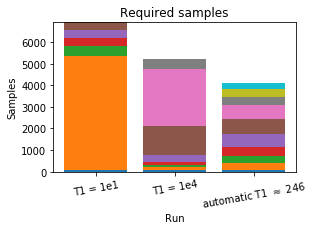

In [54]:
h_acctemp = pyabc.History("sqlite:///h_cr_acctemp.db")
h_temp10 = pyabc.History("sqlite:///h_cr_temp10.db")
h_temp1000 = pyabc.History("sqlite:///h_cr_temp1000.db")
h_temp10000 = pyabc.History("sqlite:///h_cr_temp10000.db")
histories = [h_temp10, h_temp10000, h_acctemp]
labels = [r"T1 = 1e1", r"T1 = 1e4", r"automatic T1 $\approx$ 246"]
pyabc.visualization.plot_sample_numbers(histories, labels, rotation=10)

plt.gcf().set_size_inches((4, 3))
plt.savefig("cr_fixed_T1.svg", format='svg')

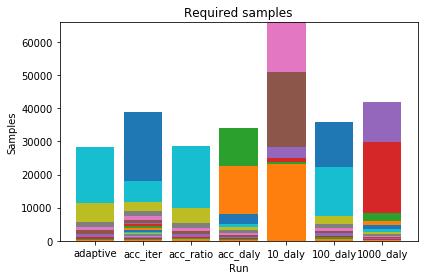

In [37]:
histories = [history_adaptive, history_acc_iter, history_acc_ratio, history_daly, history_10, history_100, history_1000]
labels = ["adaptive", "acc_iter", "acc_ratio", "acc_daly", "10_daly", "100_daly", "1000_daly"]
pyabc.visualization.plot_sample_numbers(histories, labels)